In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

In [2]:
r = requests.get('https://corona.lmao.ninja/countries')

data = json.loads(r.text)

data = json_normalize(data)

data = data.drop(columns=['todayDeaths', 'todayCases', 'updated', 'countryInfo._id', 'countryInfo.iso3', 'countryInfo.lat', 
                         'countryInfo.long', 'countryInfo.flag'])

data = data[:25]

data = data.set_index('countryInfo.iso2')

data

,country,cases,deaths,recovered,active,critical,casesPerOneMillion,deathsPerOneMillion
countryInfo.iso2,,,,,,,,
US,USA,164253,3167,5507,155579,3512,496.0,10.0
IT,Italy,101739,11591,14620,75528,3981,1683.0,192.0
ES,Spain,87956,7716,16780,63460,5231,1881.0,165.0
DE,Germany,66885,645,13500,52740,1979,798.0,8.0
FR,France,44550,3024,7927,33599,5056,683.0,46.0
IR,Iran,41495,2757,13911,24827,3511,494.0,33.0
GB,UK,22141,1408,135,20598,163,326.0,21.0
CH,Switzerland,15922,359,1823,13740,301,1840.0,41.0
BE,Belgium,11899,513,1527,9859,927,1027.0,44.0


In [3]:
cpm = data['casesPerOneMillion'].sum()

terry = data['casesPerOneMillion']

cpm

15613.0

In [4]:
for entry in terry:
    data['Percent(CPM)'] = terry / cpm * 100

In [5]:
data.head(3)

,country,cases,deaths,recovered,active,critical,casesPerOneMillion,deathsPerOneMillion,Percent(CPM)
countryInfo.iso2,,,,,,,,,
US,USA,164253,3167,5507,155579,3512,496.0,10.0,3.176840
IT,Italy,101739,11591,14620,75528,3981,1683.0,192.0,10.779479
ES,Spain,87956,7716,16780,63460,5231,1881.0,165.0,12.047653


In [6]:
data.describe()

,cases,deaths,recovered,active,critical,casesPerOneMillion,deathsPerOneMillion,Percent(CPM)
count,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,25945.04000,1331.640000,3382.760000,21230.640000,1120.040000,624.520000,27.756000,4.000000
std,39781.03172,2738.795688,5458.856392,34416.380885,1692.078024,527.021514,48.151411,3.375530
min,2449.00000,8.000000,1.000000,2110.000000,14.000000,22.000000,0.400000,0.140908
25%,4462.00000,54.000000,127.000000,4216.000000,94.000000,198.000000,2.000000,1.268174
50%,9618.00000,162.000000,250.000000,6268.000000,193.000000,496.000000,11.000000,3.176840
75%,22141.00000,864.000000,5408.000000,20598.000000,1053.000000,798.000000,33.000000,5.111125
max,164253.00000,11591.000000,16780.000000,155579.000000,5231.000000,1881.000000,192.000000,12.047653


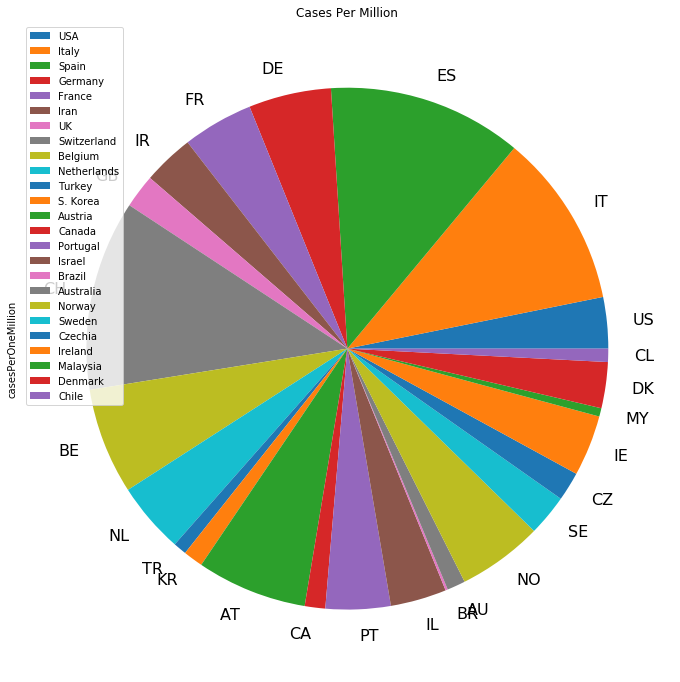

In [7]:
plot = data.plot.pie(y='casesPerOneMillion', figsize=[20, 12], title="Cases Per Million", fontsize=16)

plt.legend(labels=data['country'])

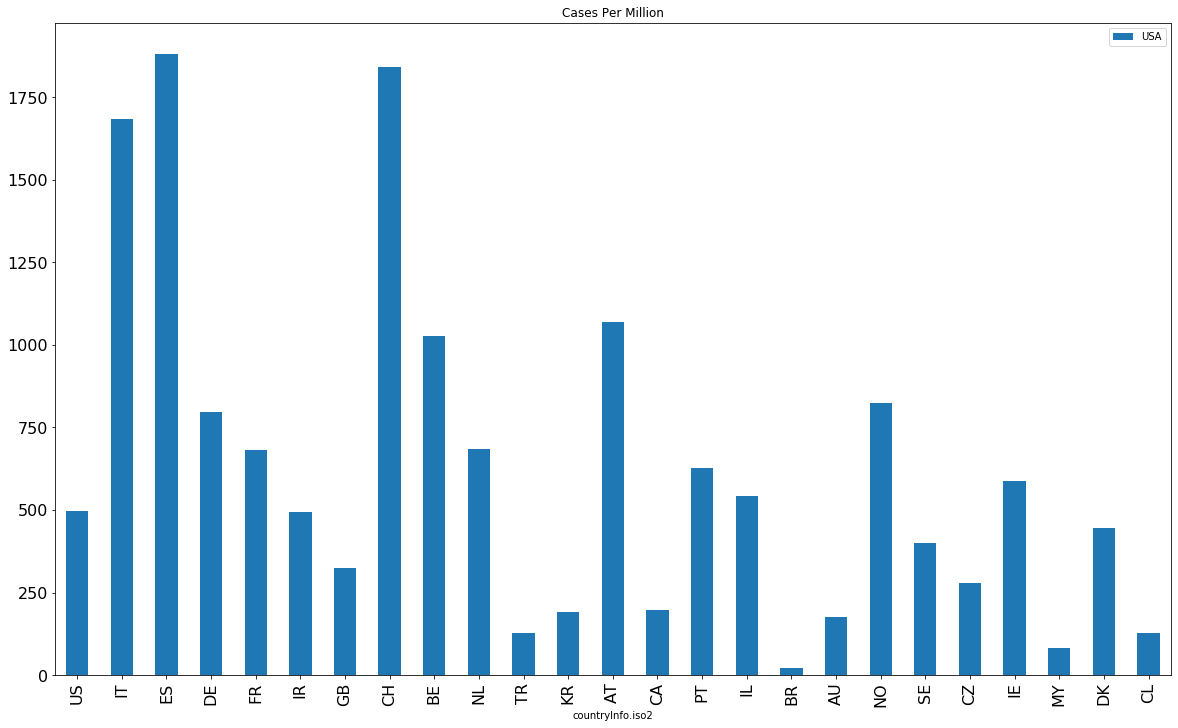

In [8]:
bar = data.plot.bar(y='casesPerOneMillion', figsize=[20, 12], title="Cases Per Million", fontsize=16)

plt.legend(labels=data['country'])